# IMPORTS:

In [1]:
import pandas as pd
import numpy as np
import re
import string
import emoji
import os
import random as rn
import tensorflow as tf
import matplotlib.pyplot as plt  

from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models.word2vec import Word2Vec

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.models import Model
from keras.layers.core import Dropout
from keras import regularizers

%matplotlib inline

Using TensorFlow backend.


# Settings for better readabilty and shuting down tensorflow warnings
     run cell below only once

In [2]:
pd.set_option('display.max_colwidth', -1) # to view full content of each cell

# Load And analyse the dataset we created by extracting tweets from twitter using Tweepy API

In [3]:
tweets = pd.read_csv('TweetlabelledFinal.csv')
tweets.head()

,ID,Date- Time,User_Name,Tweet,Sentiment
0,1286896213657346050,2020-07-25 05:29:01,BALLl,"i need to make my own SapceX, some people dont deserve to live here",positive
1,1286905185273610241,2020-07-25 06:04:40,T:HE:JAMES. HMRH,"Thre was mention of this earlier, the infraction on the views of the cosmos from the SapceX array and how astronomy would compensate. https://t.co/I5omeFq4SM",neutral
2,1287391022218006531,2020-07-26 14:15:12,Anshi Pathak,@bhab005 @KanganaTeam @kunalpande8 Sachine Tendulkar handle his account and but here kangana team handles her. That's the difference here. And if she is doing that what's funny. She has earned that right. Also Jo log khud nahi bolte h wo dusron se bulwate Hain. Wo khud bol rahi h to galat. Kya h.,positive
3,1287495418180501505,2020-07-26 21:10:02,Goodauld69th,Mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds,negative
4,1287731665452769280,2020-07-27 12:48:48,Sardar Khan,@gareebscientist @GauravG91 @Chandel1402 @isro @SpaceX He I mean... Vaibhav....spacex is doing great work.. But its unfair to compare two.. No offense to sapcex but I will chose ISRO over spacex AnyDay....,negative


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29348 entries, 0 to 29347
Data columns (total 5 columns):
ID            29348 non-null int64
Date- Time    29348 non-null object
User_Name     29345 non-null object
Tweet         29348 non-null object
Sentiment     29348 non-null object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [5]:
tweets= tweets[['Sentiment','Tweet']]
tweets.head()

,Sentiment,Tweet
0,positive,"i need to make my own SapceX, some people dont deserve to live here"
1,neutral,"Thre was mention of this earlier, the infraction on the views of the cosmos from the SapceX array and how astronomy would compensate. https://t.co/I5omeFq4SM"
2,positive,@bhab005 @KanganaTeam @kunalpande8 Sachine Tendulkar handle his account and but here kangana team handles her. That's the difference here. And if she is doing that what's funny. She has earned that right. Also Jo log khud nahi bolte h wo dusron se bulwate Hain. Wo khud bol rahi h to galat. Kya h.
3,negative,Mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds
4,negative,@gareebscientist @GauravG91 @Chandel1402 @isro @SpaceX He I mean... Vaibhav....spacex is doing great work.. But its unfair to compare two.. No offense to sapcex but I will chose ISRO over spacex AnyDay....


# Cleaning Data

        From the tweets we need to remove:
        1. mentions or usernames : @abcd
        2. Hashtags : #happy --> happy
        3. convert all tweets in Lowercase :
                this is done because upeercase and lower case charecters are treated as differnt as a result 
                while converting a word in vector , same words may give different vectors if the casing of the letters
                in the words varies.
        4. Remove extra white spaces
        5. Remove numbers/digits
        6. Remove Hyperlinks
        7. Remove New Lines
        
        re.sub(r'@[A-za-z0-9]+','',text) :
        r: tells python the text is raw text
        @[A-za-z0-9]+ : any pattern starting with @ and followed by letterts or alphabet one or more.

        'http?s:\/\/\S+' : remove http, '?s' means s may or may not be present folowwed by // till we  
                           get one or more white space denoted by'S+'

In [6]:
# create a function to clean text
def cleanTxt(text):
    text= re.sub(r'@[A-za-z0-9]+','',text) # remove mentions
    text= re.sub(r'#','',text) # remove # from text
    text= re.sub(r'http?s:\/\/\S+','',text) # remove Hyperlink
    text= re.sub(r'\n',' ',text) # remove new line
    text = re.sub(r'\d+','', text) # remove numbers
    
    # remove punctuations and convert characters to lower case
    text = "".join([char.lower() for char in text if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text = re.sub('\s+', ' ', text).strip()
    
    return text

# Apply cleanTxt to our data

In [7]:
tweets['Tweet']= tweets['Tweet'].apply(cleanTxt)
tweets.head()

,Sentiment,Tweet
0,positive,i need to make my own sapcex some people dont deserve to live here
1,neutral,thre was mention of this earlier the infraction on the views of the cosmos from the sapcex array and how astronomy would compensate
2,positive,sachine tendulkar handle his account and but here kangana team handles her thats the difference here and if she is doing that whats funny she has earned that right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h to galat kya h
3,negative,mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds
4,negative,he i mean vaibhavspacex is doing great work but its unfair to compare two no offense to sapcex but i will chose isro over spacex anyday


# The Tweets Still contains Emoji 😉  

    we can either remove them or replace them with equivalent text as sometimes these emoji do carry valuable
    sentiments/information 
    example:
    The food was 😍 : the emoji suggest the food was good (positive sentiment)
    The food was 😑 : the emoji sugeest the food was bad or average (negative sentiment)
    without emoji the text "The food was" seems to be Neutral
    
    Therefore its better to retain the emoji by converting them to text in order to retain the actual sentiment 
    
    Note:
    while replcaing emoji , emoji that are represented by multiple words ex: Happy_face or red-heart
    so we also need to replace the "_", "-" with blank space.
    
    delimiters=("", "") : by default delimeters are : , : i.e the text for emoji will place between two colons
                          so replace the colon with empty string.

In [8]:
def convertEmoji(text):
    text = emoji.demojize(text, delimiters=("", ""))
    text = text = re.sub(r'_',' ', text) # replace underscore with single white space
    text = text = re.sub(r'-',' ', text) # replace '-' with single white space
    return text

# Apply emoji conversion to our data

In [9]:
tweets['Tweet']= tweets['Tweet'].apply(convertEmoji)
tweets.head()

,Sentiment,Tweet
0,positive,i need to make my own sapcex some people dont deserve to live here
1,neutral,thre was mention of this earlier the infraction on the views of the cosmos from the sapcex array and how astronomy would compensate
2,positive,sachine tendulkar handle his account and but here kangana team handles her thats the difference here and if she is doing that whats funny she has earned that right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h to galat kya h
3,negative,mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds
4,negative,he i mean vaibhavspacex is doing great work but its unfair to compare two no offense to sapcex but i will chose isro over spacex anyday


# Now the Text free from mentions/Usernames , # , Hyperlinks and emojis are replaced with their meanings

      also as the emoji are now converted to words , the sentiment of the tweet might change hence lets update 
      the sentiment accordingly

In [10]:
def get_tweet_sentiment(tweet): 
    
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 1
    elif analysis.sentiment.polarity == 0: 
        return 2
    else: 
        return 0

In [11]:
tweets['Sentiment']= tweets['Tweet'].apply(get_tweet_sentiment)
tweets.head()

,Sentiment,Tweet
0,1,i need to make my own sapcex some people dont deserve to live here
1,2,thre was mention of this earlier the infraction on the views of the cosmos from the sapcex array and how astronomy would compensate
2,1,sachine tendulkar handle his account and but here kangana team handles her thats the difference here and if she is doing that whats funny she has earned that right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h to galat kya h
3,0,mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds
4,0,he i mean vaibhavspacex is doing great work but its unfair to compare two no offense to sapcex but i will chose isro over spacex anyday


# Now to Normailze the text , convert the text into tokens and perfrom stemming

    Tokenizing: Turning the tweets into tokens. Tokens are words separated by spaces in a text.
    
    Normalization: Normalization generally refers to a series of related tasks meant to put all text on the same level.
                   Converting text to lower case, removing special characters, and removing stopwords will remove basic
                   inconsistencies. Normalization improves text matching.
                   
                   we have already done majority of normalization ,only stopwords removal remians.
            
     Stopword removal: Some words do not contribute much to the machine learning model, so it's good to remove them.
                       
     Stemming: Eliminating affixes (circumfixes, suffixes, prefixes, infixes) from a word in order to obtain a word stem.
               Porter Stemmer is the most widely used technique because it is very fast.
               Generally, stemming chops off end of the word, and mostly it works fine.
               Example: Working -> Work
               
     Lemmatization: The goal is same as with stemming, but stemming a word sometimes loses the actual meaning of the word.
                    Lemmatization usually refers to doing things properly using vocabulary and morphological analysis of
                    words. It returns the base or dictionary form of a word, also known as the lemma .
                Example: Better -> Good.
                
      Here i am going to use lemmatization
      
      syntax .lemmatize(word, pos='a'):
              pos : part of speech tag , defualt : n (Noun)
              pos = 'a' : adjective 
              example:
              lemmatize('better',pos='a')==> good

In [12]:
def Tokenization(tweet):
    
    #convert to tokens and filter out stopwords
    stop_words = set(stopwords.words('english'))
    tweet_tokens = word_tokenize(tweet) 
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in filtered_words]
    
    return " ".join(lemma_words)

# Apply Tokenization to the Tweets

In [13]:
tweets['Tweet_Tokenized']= tweets['Tweet'].apply(Tokenization)
tweets.tail(10)

,Sentiment,Tweet,Tweet_Tokenized
29338,2,me in october vs me after four years of trump administration election night,october vs four years trump administration election night
29339,0,georgia still has at least votes left to count secretary of state says too close to call,georgia still least votes left count secretary state says close call
29340,1,urgent ayone who was told use sharpies get in touch w he needs to hear from you call him now watch s broadcast radio election too close to call legal battle begins,urgent ayone told use sharpies get touch w needs hear call watch broadcast radio election close call legal battle begins
29341,1,praying for arnab goswami to be safe amp sound praying for republic tv staff praying for freedom of speech praying for justice indiawitharnab glowing starglowing starglowing star,praying arnab goswami safe amp sound praying republic tv staff praying freedom speech praying justice indiawitharnab glowing starglowing starglowing star
29342,0,dont be fooled the delays in the us election result mean our system is working lawrence douglas,dont fooled delays us election result mean system working lawrence douglas
29343,2,bjp leader ram kadam to meet the maharashtra governor at am tomorrow to discuss the treatment meted out to arnab goswami,bjp leader ram kadam meet maharashtra governor tomorrow discuss treatment meted arnab goswami
29344,0,gained one here black lives matter poc lives matter,gained one black lives matter poc lives matter
29345,2,baat achhi hai but bjp needs to ensure his safety and wellbeing congress minister has already cleared that one team is formed only to harass arnab goswami,baat achhi hai bjp needs ensure safety wellbeing congress minister already cleared one team formed harass arnab goswami
29346,2,mohamed salah rates liverpools champions league chances as rio ferdinand backs reds,mohamed salah rates liverpools champions league chances rio ferdinand backs reds
29347,0,people used to think arnab was a spokesman of the bjp well people were wrong bjp is the spokesperson of arnab goswami,people used think arnab spokesman bjp well people wrong bjp spokesperson arnab goswami


In [14]:
tweets_array = tweets['Tweet_Tokenized'].values
tweets_array

array(['need make sapcex people dont deserve live',
       'thre mention early infraction views cosmos sapcex array astronomy would compensate',
       'sachine tendulkar handle account kangana team handles thats difference whats funny earned right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h galat kya h',
       ...,
       'baat achhi hai bjp needs ensure safety wellbeing congress minister already cleared one team formed harass arnab goswami',
       'mohamed salah rates liverpools champions league chances rio ferdinand backs reds',
       'people used think arnab spokesman bjp well people wrong bjp spokesperson arnab goswami'],
      dtype=object)

# Convert labels in One hot encoded vectors
    
        negetive (0) = [1,0,0]
        positive (1) = [0,1,0]
        neutral (2) =  [0,0,1]

In [15]:
tweets_label =tweets['Sentiment'].values
tweets_label

array([1, 2, 1, ..., 2, 2, 0], dtype=int64)

In [16]:
one_hot_encoder = OneHotEncoder(sparse=False,categories='auto')
one_hot_encoder.fit(tweets_label.reshape(-1,1))

TweetLabel_encoded = one_hot_encoder.transform(tweets_label.reshape(-1,1))
TweetLabel_encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

# Divide the tweet in an array of token (Tokenize)
    each tweet is converted into an array of tokens

In [17]:
Tokenized_Tweet = [word_tokenize(tweet) for tweet in tweets_array]
Tokenized_Tweet[0:5]

[['need', 'make', 'sapcex', 'people', 'dont', 'deserve', 'live'],
 ['thre',
  'mention',
  'early',
  'infraction',
  'views',
  'cosmos',
  'sapcex',
  'array',
  'astronomy',
  'would',
  'compensate'],
 ['sachine',
  'tendulkar',
  'handle',
  'account',
  'kangana',
  'team',
  'handles',
  'thats',
  'difference',
  'whats',
  'funny',
  'earned',
  'right',
  'also',
  'jo',
  'log',
  'khud',
  'nahi',
  'bolte',
  'h',
  'wo',
  'dusron',
  'se',
  'bulwate',
  'hain',
  'wo',
  'khud',
  'bol',
  'rahi',
  'h',
  'galat',
  'kya',
  'h'],
 ['mainly',
  'stoltenberg',
  'scandanavian',
  'cowardly',
  'attacks',
  'oil',
  'pipe',
  'lines',
  'running',
  'like',
  'weird',
  'inbred',
  'fish',
  'savages',
  'underground',
  'bunkers',
  'wont',
  'dive',
  'world',
  'like',
  'nazis',
  'spitefull',
  'abusive',
  'fucking',
  'everything',
  'dumb',
  'inbreds'],
 ['mean',
  'vaibhavspacex',
  'great',
  'work',
  'unfair',
  'compare',
  'two',
  'offense',
  'sapcex',
 

# Convert Tweets into Vectors

# what is word embeddins , CBow And Skip-gram ?
    
    ref : https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa

    Word embeddings are vector representations of a particular word.
    Word embedding is one of the most popular representation of document vocabulary. 
    It is capable of capturing context of a word in a document, semantic and syntactic similarity, 
    relation with other words, etc.
    
    The objective is to have words with similar context occupy close spatial positions. 
    Mathematically, the cosine of the angle between such Word vectors should be close to 1, i.e. angle close to 0.
    
    Word embedding using word2vec can be obtained using two methods (both involving Neural Networks)
    Skip Gram and Common Bag Of Words (CBOW)

    CBOW Model: This method takes the context of each words/vectors of V dimension as the input and tries to predict a word
    corresponding to the context of V dimension.
    ex: The sentence = Have a great day!
        input/context words : have , a , great
        output/target word : day
       
![](Cbow.png)

    Skip- Gram : For each context words/vector of Dimension V we give as an input , we get c(window size) T
    arget words of dimension V.
     ex: The sentence = Have a great day!
         input/context word : great
         output/target words : have , a , day
         
![](skipgram.png)

# Build Word2Vec Model

    parameter sg = 0 (default) means we are using Cbow
              sg = 1 , means we are using Skip grams
              size : the size of the vector we want
              sentences : the tweets we want to convert into indiviual vectors
              window : the number of adjacent neighbours to consider while using the Word2Vec Model.
              Min_count : the minimum frequency of a word in the all the sentences for the Model to consider and 
                          include it in the vocabulary.
                          ex : if min_count = 5
                               the word 'rain' appears less than 5 times in all tweets , 
                               'rain' wont be included in the vocabulary

In [18]:
Encoding_dim= 250
model_cbow = Word2Vec(sentences=Tokenized_Tweet,window=5,min_count=5,size=Encoding_dim)
model_sg = Word2Vec(sentences=Tokenized_Tweet,window=5,min_count=5,size=Encoding_dim,sg=1)

# Train Word2Vec Models

In [19]:
model_cbow.train(Tokenized_Tweet, total_examples= len(Tokenized_Tweet),epochs=50)

(16330781, 19706300)

In [20]:
model_sg.train(Tokenized_Tweet, total_examples= len(Tokenized_Tweet),epochs=50)

(16330707, 19706300)

In [21]:
words_cbow=list(model_cbow.wv.vocab)
len(words_cbow)

9197

In [22]:
words_sg=list(model_sg.wv.vocab)
len(words_sg)

9197

# Test Models using similarity method

In [23]:
word = 'bitcoin'
model_cbow.wv.most_similar(word,topn = 20)

[('btc', 0.6150566339492798),
 ('crypto', 0.6010921597480774),
 ('eth', 0.5249499082565308),
 ('ethereum', 0.5242225527763367),
 ('altcoins', 0.5105832815170288),
 ('hodl', 0.5055743455886841),
 ('cryptocurrencies', 0.46625199913978577),
 ('cryptocurrency', 0.4414551854133606),
 ('xrp', 0.42685064673423767),
 ('blockchain', 0.4193698465824127),
 ('defi', 0.41674426198005676),
 ('stocks', 0.39140114188194275),
 ('ada', 0.38981810212135315),
 ('usd', 0.3822994530200958),
 ('invested', 0.3770158588886261),
 ('currency', 0.3751904368400574),
 ('earn', 0.3740183711051941),
 ('bch', 0.3679470419883728),
 ('define', 0.35703039169311523),
 ('option', 0.34550565481185913)]

In [24]:
word = 'artificial'
model_sg.wv.most_similar(word,topn = 20)

[('intelligence', 0.8998962044715881),
 ('artificialintelligence', 0.5137750506401062),
 ('mimics', 0.49693480134010315),
 ('ai', 0.46758270263671875),
 ('dl', 0.437029093503952),
 ('intoainews', 0.4299084544181824),
 ('pharma', 0.4249636232852936),
 ('daysofcode', 0.4207439124584198),
 ('predicting', 0.413147896528244),
 ('fintech', 0.401726096868515),
 ('tensorflow', 0.39836356043815613),
 ('segmentation', 0.39710670709609985),
 ('coding', 0.3928218483924866),
 ('psychology', 0.39237675070762634),
 ('renaissance', 0.3855959177017212),
 ('nationwide', 0.38448524475097656),
 ('bigdata', 0.38407376408576965),
 ('blockchain', 0.3839450776576996),
 ('deeplearning', 0.3815392553806305),
 ('machinelearning', 0.37518200278282166)]

# after evaluation of CBoW nd Skip Gram 

    i decided to continue with CBoW 

# Preparing Vectors of Tweets for our classifie

    Since our data contains tweets and not just words, we need to use the word vectors from word2vec model to create
    vector representation for an entire tweet.
    so to create a vector representing an entire tweet, we simply take mean of all the word vectors present in the tweet.
    The length of the resultant vector will be the same( i.e. Encoding_dim) 
    The process is repeated for all the tweets in our data in order to obtain their corressponding vectors.

In [25]:
len(Tokenized_Tweet) # no of tokenized tweets

29348

In [26]:
print(Tokenized_Tweet[0]) # view the tweet token of the tweet at index 0
print(Tokenized_Tweet[1]) # view the tweet token of the tweet at index 1

['need', 'make', 'sapcex', 'people', 'dont', 'deserve', 'live']
['thre', 'mention', 'early', 'infraction', 'views', 'cosmos', 'sapcex', 'array', 'astronomy', 'would', 'compensate']


In [27]:
model_cbow.wv['sad']  # vector representation of a token or word in a tweet

array([ 1.0798498 , -1.7057436 ,  0.89928627, -1.3553702 , -0.46884117,
        0.01209344, -1.3044342 ,  0.83816814, -0.75915295, -0.9986764 ,
        0.6852859 ,  0.23046848, -0.03868016, -0.6272245 , -0.06491423,
       -0.50431836, -0.9103309 ,  0.67261225,  0.08951392,  1.0735915 ,
        0.7370806 , -0.8320121 , -1.4697175 ,  0.2744296 ,  0.13907978,
        0.15305959, -0.6979964 , -1.7326281 , -0.13844812, -0.95719975,
        1.3783005 , -0.6221929 ,  0.20053077, -1.477203  , -1.0058147 ,
       -0.01754995, -0.85515267,  0.8265999 ,  0.72314817,  1.4588473 ,
        0.3969219 ,  0.04417178,  0.06816953, -1.922965  , -0.42649966,
       -0.3935606 ,  0.07368789, -0.0273664 ,  0.3413115 ,  0.16461815,
        0.6612189 ,  1.0865195 ,  0.6225645 , -0.24476364,  0.02415653,
        0.57018703,  0.31919914, -1.0398405 , -0.81495047,  1.5860854 ,
       -0.60121334, -1.2395784 , -0.9642244 , -0.00444232,  0.3996515 ,
        0.5258818 , -0.55650884, -0.58711505, -0.48445836, -0.07

In [28]:
len(model_cbow.wv['king']) # length of word/ token in tweet

250

# Function to convert a tweet(broken into tokens) 

    size of each tweet_vector = encoding_dim 

In [29]:
def Tweet_vector(Tweet_tokenized):
    vector = np.zeros(Encoding_dim).reshape((1,Encoding_dim)) # 1 row ; encoding_dim columns
    count = 0
    for token in Tweet_tokenized:
        try:
            vector += model_cbow.wv[token].reshape((1,Encoding_dim))  # 1 row ; encoding_dim columns
            count += 1
        except KeyError:  # handling the case where the token is not in vocabulary
            continue      # simply ignore such case
            
    if count != 0:
        vector /= count
        
    return vector

# convert each tweet into an individual vector of size = Encoding_Dimension

    so after this we should have a dataset with:
    Number of rows = number of tweets
    Number of columns = Encoding_Dim (size of each vector representation an individual tweet)

In [30]:
Tweetvec_array = np.zeros((len(Tokenized_Tweet), Encoding_dim)) #numpy array of all zeros; contains cols = encoding_dim and rows= no of tweets

#populating the array with corressponding vector representation of tweets
for i in range(len(Tokenized_Tweet)):
    Tweetvec_array[i,:] = Tweet_vector(Tokenized_Tweet[i])  #[i,:] ith row ; ':' means all columns

In [31]:
Tweetvector = pd.DataFrame(Tweetvec_array)
Tweetvector.shape

(29348, 250)

In [32]:
Tweetvector.loc[0] #print content of entire row with index 0

0     -0.030176
1     -1.309999
2      0.249434
3     -0.424047
4     -0.778340
5      1.024867
6      0.038334
7     -0.543993
8      0.725501
9      0.831867
10     0.232699
11    -0.563547
12    -0.252013
13    -0.065877
14    -0.363769
15     0.450227
16    -0.352713
17    -0.651416
18     0.117850
19     0.591296
20     0.365616
21    -0.125667
22     0.885298
23     0.055914
24    -0.122813
25     0.467638
26     0.236150
27    -0.523340
28     0.754604
29    -0.351651
         ...   
220   -0.595305
221   -0.302643
222    0.009379
223   -0.656174
224    1.615270
225   -0.532795
226   -0.267202
227    0.094141
228    1.255234
229   -0.419136
230    0.186096
231   -0.344814
232    0.103691
233    0.039026
234    0.064576
235    0.185723
236   -0.889720
237    0.258974
238   -0.122378
239    0.156468
240   -0.680591
241   -0.350275
242    0.425246
243    0.172154
244   -0.934698
245   -0.346600
246    0.332818
247   -0.154491
248    0.499176
249   -0.271692
Name: 0, Length: 250, dt

In [33]:
TweetLabel_encoded.shape  # lables

(29348, 3)

In [34]:
Tweetvector.shape # vector representation of tweets

(29348, 250)

# Finally the Data is ready to be used to train a neural network classifier


# Split data into training and test sets :

In [35]:
Tweet_train, Tweet_test, sentiment_train, sentiment_test = train_test_split(Tweetvector, TweetLabel_encoded, random_state=101, test_size=0.20)

In [36]:
print(Tweet_train.shape)
print(Tweet_test.shape)
print(sentiment_train.shape)
print(sentiment_test.shape)

(23478, 250)
(5870, 250)
(23478, 3)
(5870, 3)


# Setting Random seed for numpy and tensorflow so that the results are reproducible

In [37]:
# Set a random seed for reproduceabilty
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers in a well-defined state.
rn.seed(12345)

# Force TensorFlow to use single thread.
# Multiple threads are a potential source of non-reproducible results.
session_conf = tf.ConfigProto( intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

# The below tf.set_random_seed() will make random number generation in the TensorFlow backend have a well-defined initial state.
tf.set_random_seed(1234)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

# Building the Neural Network Classifier using Keras And Tensorflow

    Parameters of the model:
        

In [38]:
classifier = Sequential()
classifier.add(Dense(125, input_dim=Encoding_dim, activation='relu',name='hidden1'))
classifier.add(Dropout(0.40))
classifier.add(Dense(62,activation='relu',name='hidden2'))
classifier.add(Dropout(0.30))
classifier.add(Dense(30,activation='relu',name='hidden3'))
classifier.add(Dropout(0.25))
classifier.add(Dense(15,activation='relu',name='hidden4'))
classifier.add(Dropout(0.25))
classifier.add(Dense(3,activation='softmax',name='output'))
classifier.compile(loss='binary_crossentropy', optimizer='adamax',metrics=['categorical_accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [39]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 125)               31375     
_________________________________________________________________
dropout_1 (Dropout)          (None, 125)               0         
_________________________________________________________________
hidden2 (Dense)              (None, 62)                7812      
_________________________________________________________________
dropout_2 (Dropout)          (None, 62)                0         
_________________________________________________________________
hidden3 (Dense)              (None, 30)                1890      
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
hidden4 (Dense)              (None, 15)                465       
__________

In [40]:
trained_model=classifier.fit(Tweet_train,sentiment_train,epochs=50,batch_size=25,validation_data=(Tweet_test,sentiment_test))

Instructions for updating:
Use tf.cast instead.
Train on 23478 samples, validate on 5870 samples
Epoch 1/50
23478/23478 [==============================] - 7s 289us/step - loss: 0.5828 - categorical_accuracy: 0.5047 - val_loss: 0.4835 - val_categorical_accuracy: 0.6521
Epoch 2/50
23478/23478 [==============================] - 4s 166us/step - loss: 0.5092 - categorical_accuracy: 0.6196 - val_loss: 0.4489 - val_categorical_accuracy: 0.6840
Epoch 3/50
23478/23478 [==============================] - 3s 147us/step - loss: 0.4762 - categorical_accuracy: 0.6597 - val_loss: 0.4323 - val_categorical_accuracy: 0.6995
Epoch 4/50
23478/23478 [==============================] - 3s 147us/step - loss: 0.4564 - categorical_accuracy: 0.6757 - val_loss: 0.4193 - val_categorical_accuracy: 0.7066
Epoch 5/50
23478/23478 [==============================] - 4s 150us/step - loss: 0.4418 - categorical_accuracy: 0.6951 - val_loss: 0.4103 - val_categorical_accuracy: 0.7175
Epoch 6/50
23478/23478 [===================

Epoch 47/50
23478/23478 [==============================] - 3s 145us/step - loss: 0.2613 - categorical_accuracy: 0.8476 - val_loss: 0.4111 - val_categorical_accuracy: 0.7446
Epoch 48/50
23478/23478 [==============================] - 3s 147us/step - loss: 0.2618 - categorical_accuracy: 0.8484 - val_loss: 0.4116 - val_categorical_accuracy: 0.7438
Epoch 49/50
23478/23478 [==============================] - 3s 145us/step - loss: 0.2610 - categorical_accuracy: 0.8455 - val_loss: 0.4137 - val_categorical_accuracy: 0.7463
Epoch 50/50
23478/23478 [==============================] - 4s 158us/step - loss: 0.2527 - categorical_accuracy: 0.8525 - val_loss: 0.4200 - val_categorical_accuracy: 0.7448


# Visualize Traing & Test Loss

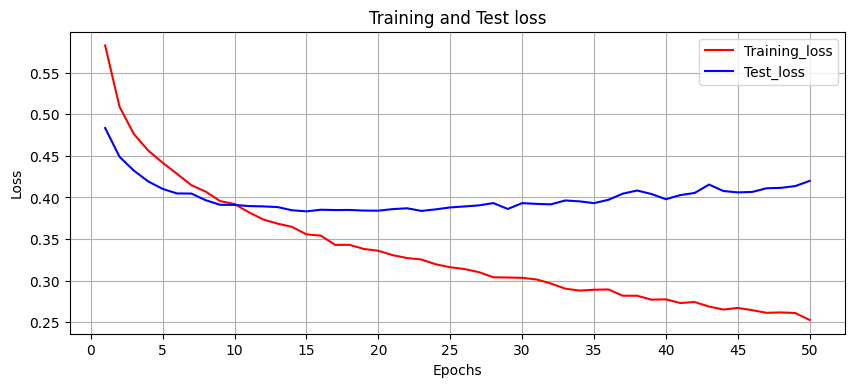

In [41]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
epochs = range(1, 51)
plt.plot(epochs, loss, 'r', label='Training_loss')
plt.plot(epochs, val_loss, 'b', label='Test_loss')
plt.xticks(np.arange(0,51,5))
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Visualize Training & test Set Accuracy

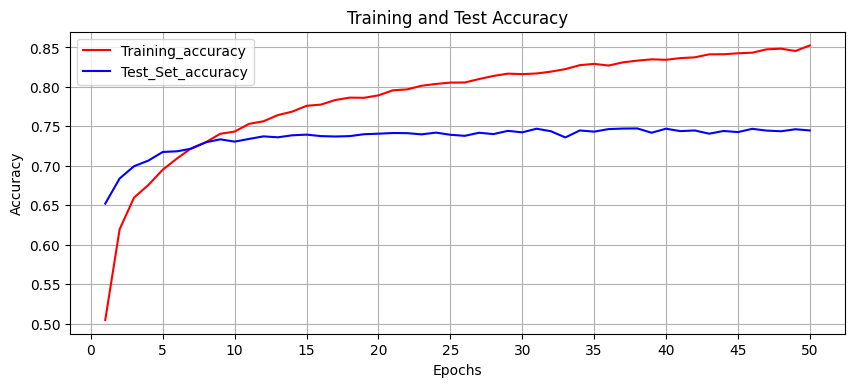

In [42]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

plt.clf()
acc = trained_model.history['categorical_accuracy']
val_acc = trained_model.history['val_categorical_accuracy']
plt.plot(epochs, acc, 'r', label='Training_accuracy')
plt.plot(epochs, val_acc, 'b', label='Test_Set_accuracy')
plt.title('Training and Test Accuracy')
plt.xticks(np.arange(0,51,5))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Inference :

    Based on the above Graph , the number of epoch selected is = 20

In [43]:
classifier = Sequential()
classifier.add(Dense(100, input_dim=Encoding_dim, activation='relu',name='hidden1'))
classifier.add(Dropout(0.40))
classifier.add(Dense(50,activation='relu',name='hidden2'))
classifier.add(Dropout(0.30))
classifier.add(Dense(25,activation='relu',name='hidden3'))
classifier.add(Dropout(0.25))
classifier.add(Dense(10,activation='relu',name='hidden4'))
classifier.add(Dropout(0.25))
classifier.add(Dense(3,activation='softmax',name='output'))
classifier.compile(loss='binary_crossentropy', optimizer='adamax',metrics=['categorical_accuracy'])
trained_model = classifier.fit(Tweet_train,sentiment_train, epochs=20, batch_size=25)

Epoch 1/20
23478/23478 [==============================] - 4s 173us/step - loss: 0.5938 - categorical_accuracy: 0.4741
Epoch 2/20
23478/23478 [==============================] - 3s 129us/step - loss: 0.5266 - categorical_accuracy: 0.6035
Epoch 3/20
23478/23478 [==============================] - 4s 169us/step - loss: 0.5016 - categorical_accuracy: 0.6366
Epoch 4/20
23478/23478 [==============================] - 3s 134us/step - loss: 0.4802 - categorical_accuracy: 0.6597
Epoch 5/20
23478/23478 [==============================] - 3s 130us/step - loss: 0.4668 - categorical_accuracy: 0.6744
Epoch 6/20
23478/23478 [==============================] - 3s 129us/step - loss: 0.4528 - categorical_accuracy: 0.6954
Epoch 7/20
23478/23478 [==============================] - 3s 130us/step - loss: 0.4397 - categorical_accuracy: 0.7024
Epoch 8/20
23478/23478 [==============================] - 3s 129us/step - loss: 0.4316 - categorical_accuracy: 0.7071
Epoch 9/20
23478/23478 [==============================] 

In [44]:
score = classifier.evaluate(Tweet_train,sentiment_train)
print("Training set loss",score[0])
print("Training set accuracy",score[1])

23478/23478 [==============================] - 1s 37us/step
Training set loss 0.2845642550712205
Training set accuracy 0.8320981344338708


In [45]:
score = classifier.evaluate(Tweet_test,sentiment_test)
print("Test set loss",score[0])
print("Test set accuracy",score[1])

5870/5870 [==============================] - 0s 35us/step
Test set loss 0.38682906261091543
Test set accuracy 0.7385008518293729


# Making Predictions and Evaluating the Classifier 

In [46]:
sentiment_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

# Converting the predicted Sentiments in vector from into their String equivalent

        The output layer of neural network has 3 perceptrons.
        Each representing a sentiment (class label)
        The output of the Neural net is treated as a vector of length 3 : [Perceptron_1 , Perceptron_2 , Perceptron_3]
        Depending on the activation state of these perceptrons we determine the class labels:
        [1,0,0] -> predicted sentiment : negetive
        [0,1,0] -> predicted sentiment : positive
        [0,0,1] -> predicted sentiment : neutral
        
        so we need to convert these predicted output vectors into their equivalent string version.
        
        SO previously ,
        First we converted string labels into numeric labels:
        negetive = 0 , positive = 1 , neutral = 2 .
        Then we used One Hot Encoding to convert these digits into vectors
        negetive (0) -> [1,0,0] ; positive (1) -> [0,1,0] ; neutral (2) -> [0,0,1]
        
        so in order to convert output vectors into their string equivelent:
        First reverse one hot encoding to convert vectors into digits
        then, convert the digits into their equivalent string format

# Convert Sentiment_test vectors into digits
 
     sentiment test are the actual labels which are in vetcor form, so convert them into single digit
     (as we need to compare predicted sentiments with actual sentiments)

In [54]:
sentiment_test_decoded = one_hot_encoder.inverse_transform(sentiment_test)
sentiment_test_decoded = sentiment_test_decoded.flatten()
sentiment_test_decoded

array([0, 1, 0, ..., 2, 1, 0], dtype=int64)

# saving the actaul sentiment in digit form into a dataframe
     
     saving it in dataframe , so that it can be used for a side by side comparison

In [56]:
sentimentdf=  pd.DataFrame( sentiment_test_decoded)

# Making predictions using the Nueral network classifier

    using the neural network classifier model to make predictions on the test set of tweet vectors.
    The predicted class label/sentiment are in vector form hence converting them into single numeric value
    and comapring them side by side.

In [57]:
pred = classifier.predict(Tweet_test)
predictions= one_hot_encoder.inverse_transform(pred)
predictions= predictions.flatten()
predictions

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [58]:
Id = sentimentdf.index
predicted_sentiments = pd.DataFrame(predictions, Id , columns = ['Predicted_sentiments'])
actual_sentiments = pd.DataFrame(sentiment_test_decoded, Id, columns = ['Actual_sentiments'])
predictions_comparions=actual_sentiments.merge(predicted_sentiments, how = 'outer', left_index = True, right_index = True)
predictions_comparions.head(10)

,Actual_sentiments,Predicted_sentiments
0,0,0
1,1,1
2,0,1
3,2,2
4,1,0
5,1,1
6,0,0
7,2,2
8,0,1
9,0,0


# Converting class labels/sentiments in numeric value into their string equivalent.

In [59]:
def convert_sent(number):
    if number == 2 :
        return 'Neutral'
    elif number == 1:
        return 'positive'
    else :
        return 'negetive'

In [60]:
predictions_comparions['Actual_sentiments'] =predictions_comparions['Actual_sentiments'].apply(convert_sent)
predictions_comparions['Predicted_sentiments'] =predictions_comparions['Predicted_sentiments'].apply(convert_sent)
predictions_comparions.head(10)

,Actual_sentiments,Predicted_sentiments
0,negetive,negetive
1,positive,positive
2,negetive,positive
3,Neutral,Neutral
4,positive,negetive
5,positive,positive
6,negetive,negetive
7,Neutral,Neutral
8,negetive,positive
9,negetive,negetive


In [61]:
predictions_comparions.groupby(['Actual_sentiments']).count()

,Predicted_sentiments
Actual_sentiments,
Neutral,1850
negetive,1920
positive,2100


# Confusion Matrix And calculating Precision Recall and F1 Score

    In the Confusion Matrix : Negetive = 0 ; Positive = 1 ; Neutral = 2 (class Labels)
                Row represents actual Sentiments while the columns represents the predicted sentiments
                
                1st row : 1st column :Actual Sentiment = Negetive ; Predicted Sentiment = Negetive
                1st row : 2nd column :Actual Sentiment = Negetive ; Predicted Sentiment = Positive
                1st row : 3rd column :Actual Sentiment = Negetive ; Predicted Sentiment = Neutral
                
                2nd row : 1st column :Actual Sentiment = Positive ; Predicted Sentiment = Negetive
                2nd row : 2nd column :Actual Sentiment = Positive ; Predicted Sentiment = Positive
                2nd row : 3rd column :Actual Sentiment = Positive ; Predicted Sentiment = Neutral
                
                3rd row : 1st column :Actual Sentiment = Neutral ; Predicted Sentiment = Negetive
                3rd row : 2nd column :Actual Sentiment = Neutral ; Predicted Sentiment = Positive
                3rd row : 3rd column :Actual Sentiment = Neutral ; Predicted Sentiment = Neutral

In [62]:
cm  = confusion_matrix(sentiment_test_decoded,predictions )
print(cm)

[[1379  277  264]
 [ 340 1520  240]
 [ 247  167 1436]]


# Precision Recall & F1 Score:

    Precison = True Postive/(Total predicted Positive) || True Postive/(True Positive + False Positive)
               Precision talks about how precise/accurate the model is, i.e. out of total predicted positive,
               how many of them are actual positive.
               
    Recall = True Positive/(Total actual Positive) || True Postive/(True Positive + False Negetive)
             Recall calculates how many of the Actual Positives the model captures by labeling it 
             as Positive (True Positive)
             
    F1 Score = (2 * Precision * Recall) / (Precision + Recall)

In [63]:
precision = precision_score(sentiment_test_decoded, predictions, average='macro')
print('Precision of the Classifier Model : %.3f' % precision)
recall = recall_score(sentiment_test_decoded, predictions, average='macro')
print('Recall of the Classifier Model : %.3f' %recall)
f1 = f1_score(sentiment_test_decoded, predictions, average='macro')
print('F1 Score of the Classifier Model : %.3f' %f1)

Precision of the Classifier Model : 0.739
Recall of the Classifier Model : 0.739
F1 Score of the Classifier Model : 0.739


# PREDICT SENTIMENT FROM USER TWEET

    Test case 1:
            "its a sad night for @RealMadridCF we lost the game 2-1, but we will come back stronger next time #Hala_Madrid",
             "@SDER You are a bully,you deserverd to be punished",
             "yes,, @IndianCricket team are the champions of the world 😍 #WINNERS #WORLDCHAPMPS",
             " THE FOOD WAS ENJOYABLE 😊 😊",
             "rest in peace !! #RIP 😢 😢"
             
     Test Case 2:
             "Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT",
             "@iamrohit you were right ...Kolkata is rightfully called the City of Joy..",
             "Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend",
             "The food could not have been more bad, One of the worst restaurant i have dined at ,
             the food actually teatsed like shit",
             "Machine learning is one of the most intersteing feilds to work on",
             " The movie was a bit boring and not so intersting for me also it was slow,
             overall it was below average !!! #Chappak"
             
      Test Case 3: ... save the test case here for future references

In [64]:
User_Tweets = ["Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT",
             "@iamrohit you were right ...Kolkata is rightfully called the City of Joy..",
             "Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend",
             " The food could not have been more bad, One of the worst restaurant i have dined at , the food actually teatsed like shit",
             "Machine learning is one of the most intersteing feilds to work on",
             " The movie was a bit boring and not so intersting for me also it was slow , overall it was below average !!! #Chappak"
             ]

IP_Tweets =  pd.DataFrame (User_Tweets,columns=['Input_Tweets'])

In [65]:
IP_Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
Input_Tweets    6 non-null object
dtypes: object(1)
memory usage: 128.0+ bytes


In [66]:
IP_Tweets

,Input_Tweets
0,"Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT"
1,@iamrohit you were right ...Kolkata is rightfully called the City of Joy..
2,"Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend"
3,"The food could not have been more bad, One of the worst restaurant i have dined at , the food actually teatsed like shit"
4,Machine learning is one of the most intersteing feilds to work on
5,"The movie was a bit boring and not so intersting for me also it was slow , overall it was below average !!! #Chappak"


In [67]:
IP_Tweets['Input_Tweets'] = IP_Tweets['Input_Tweets'].apply(cleanTxt)
IP_Tweets

,Input_Tweets
0,donald trump i have no idea how this man became the president of the country stupid worstpresident
1,you were right kolkata is rightfully called the city of joy
2,hell yeah win his th grand slam legend
3,the food could not have been more bad one of the worst restaurant i have dined at the food actually teatsed like shit
4,machine learning is one of the most intersteing feilds to work on
5,the movie was a bit boring and not so intersting for me also it was slow overall it was below average chappak


In [68]:
IP_Tweets['Input_Tweets'] = IP_Tweets['Input_Tweets'].apply(convertEmoji)
IP_Tweets

,Input_Tweets
0,donald trump i have no idea how this man became the president of the country stupid worstpresident
1,you were right kolkata is rightfully called the city of joy
2,hell yeah win his th grand slam legend
3,the food could not have been more bad one of the worst restaurant i have dined at the food actually teatsed like shit
4,machine learning is one of the most intersteing feilds to work on
5,the movie was a bit boring and not so intersting for me also it was slow overall it was below average chappak


In [69]:
IP_Tweets['Input_Tweets'] = IP_Tweets['Input_Tweets'].apply(Tokenization)
IP_Tweets

,Input_Tweets
0,donald trump idea man became president country stupid worstpresident
1,right kolkata rightfully called city joy
2,hell yeah win th grand slam legend
3,food could bad one bad restaurant dined food actually teatsed like shit
4,machine learning one intersteing feilds work
5,movie bit boring intersting also slow overall average chappak


In [70]:
IPtweets_array = IP_Tweets['Input_Tweets'].values
IPtweets_array

array(['donald trump idea man became president country stupid worstpresident',
       'right kolkata rightfully called city joy',
       'hell yeah win th grand slam legend',
       'food could bad one bad restaurant dined food actually teatsed like shit',
       'machine learning one intersteing feilds work',
       'movie bit boring intersting also slow overall average chappak'],
      dtype=object)

In [71]:
Tokenized_IPtweets = [word_tokenize(tweet) for tweet in IPtweets_array]
Tokenized_IPtweets

[['donald',
  'trump',
  'idea',
  'man',
  'became',
  'president',
  'country',
  'stupid',
  'worstpresident'],
 ['right', 'kolkata', 'rightfully', 'called', 'city', 'joy'],
 ['hell', 'yeah', 'win', 'th', 'grand', 'slam', 'legend'],
 ['food',
  'could',
  'bad',
  'one',
  'bad',
  'restaurant',
  'dined',
  'food',
  'actually',
  'teatsed',
  'like',
  'shit'],
 ['machine', 'learning', 'one', 'intersteing', 'feilds', 'work'],
 ['movie',
  'bit',
  'boring',
  'intersting',
  'also',
  'slow',
  'overall',
  'average',
  'chappak']]

In [72]:
IPTweetvec_array = np.zeros((len(Tokenized_IPtweets), Encoding_dim)) #numpy array of all zeros; contains 200 cols and rows= no of tweets

#populating the array with corressponding vector representation of tweets
for i in range(len(Tokenized_IPtweets)):
    IPTweetvec_array[i,:] = Tweet_vector(Tokenized_IPtweets[i])

In [73]:
pred = classifier.predict(IPTweetvec_array)
for i in range(len(pred)):
    pred[i]= [round(x) for x in pred[i]]
    
pred = pred.tolist() # to covert 0,1,2 to pos neg and nuetral (printing output purpose)
pred

[[0.0, 0.0, 1.0],
 [0.0, 1.0, 0.0],
 [0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0]]

In [74]:
pred_decoded = one_hot_encoder.inverse_transform(pred)
pred_decoded = pred_decoded.flatten()
pred_decoded

array([2, 1, 1, 0, 2, 0], dtype=int64)

# Check Predictions of each given Tweet

In [75]:
user_pred=[]
for i in range(len(pred_decoded)):
    if(pred_decoded[i] == 0):
        user_pred.append('Negetive')
    elif(pred_decoded[i]== 1):
        user_pred.append('Positive')
    else:
        user_pred.append('Neutral')

for i in range (len(User_Tweets)):
    print("The sentiment for review :\n",User_Tweets[i],"is :",user_pred[i],"\n")

The sentiment for review :
 Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT is : Neutral 

The sentiment for review :
 @iamrohit you were right ...Kolkata is rightfully called the City of Joy.. is : Positive 

The sentiment for review :
 Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend is : Positive 

The sentiment for review :
  The food could not have been more bad, One of the worst restaurant i have dined at , the food actually teatsed like shit is : Negetive 

The sentiment for review :
 Machine learning is one of the most intersteing feilds to work on is : Neutral 

The sentiment for review :
  The movie was a bit boring and not so intersting for me also it was slow , overall it was below average !!! #Chappak is : Negetive 

